-Repeat of the information from last time

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >260 | >1200 | >50% |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

import statsmodels.formula.api as smf
import matplotlib.dates as matplot
import warnings
warnings.filterwarnings("ignore")

The four swimmabilities criteria in the columns of the table above each define a line in the ($\mu, \sigma$) plane. For example, the second (median) criterion is a straight line:

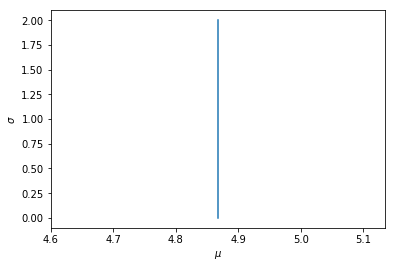

In [2]:
plt.plot([np.log(130),np.log(130)],[0,2])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$');

Read in the EColiHorizons dataset into the variable df again. You might find it helpful to make a column that is the log of the data. Then decide on the range that $\mu$ and $\sigma$ should take (by looking at the dataset) and plot the four lines on one plot. You can use the pandas where function to get the places where a condition is true, which will help you compute the percentages in the criteria. Then make another plot, and shade in the five parts of the space (categories A-E) in the appropriate colour. The next line might help you; the arguments are a list of x coordinates and then y coordinates in order around the shape. (3 marks)

In [3]:
df = pd.read_csv('EColiHorizons.csv')

In [4]:
df.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural


In [5]:
df['datetime'] = pd.to_datetime(df['Date'])
df['Day'] = df['datetime'].apply(lambda x: x.strftime('%d/%m/%Y'))
df['Month'] = df['datetime'].apply(lambda x: x.strftime('%m/%Y'))
df['Year'] = df['datetime'].apply(lambda x: x.strftime('%Y'))
df['logCount'] = np.log(df['Count'])
df.head()

,Location,Test,Date,Count,Land height,Land type,datetime,Day,Month,Year,logCount
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural,2006-01-02 09:45:00,02/01/2006,01/2006,2006,6.063785
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural,2006-01-03 10:10:00,03/01/2006,01/2006,2006,5.857933
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural,2006-03-22 11:05:00,22/03/2006,03/2006,2006,6.016157
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural,2006-05-24 10:45:00,24/05/2006,05/2006,2006,5.438079
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural,2006-06-27 11:20:00,27/06/2006,06/2006,2006,4.174387


In [6]:
df['logCount'].describe()

count    8596.000000
mean        5.100084
std         1.814058
min         0.000000
25%         3.970292
50%         5.023881
75%         6.190315
max        12.199199
Name: logCount, dtype: float64

In [7]:
rangemin = np.percentile(df.logCount, 25)
rangemax = np.percentile(df.logCount, 75)
mean = np.mean(df.logCount)
stddev = 1.814058

Now plot the lines for each of the five criteria

Blue

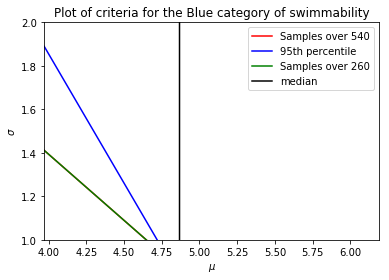

In [8]:
mu = np.arange(rangemin, rangemax, 0.1)
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.95),'r-', label='Samples over 540')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.8),'b-', label='95th percentile')
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.95),'g-', label = 'Samples over 260')
plt.plot(mu, (mu-np.log(130))/(np.max([10**(-5), norm.ppf(0.5)])), 'k-', label = 'median')
plt.axis([rangemin,rangemax,1,2])

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Plot of criteria for the Blue category of swimmability")
plt.legend(loc='upper right')

Green

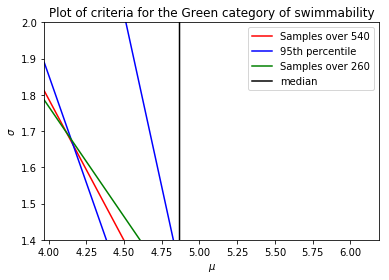

In [9]:
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.9),'r-', label='Samples over 540')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.8),'b-', label='95th percentile')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.7),'b-')
plt.plot(mu, (np.log(1000)-mu) / norm.ppf(0.95),'g-', label = 'Samples over 260')
plt.plot(mu, (mu-np.log(130))/(np.max([10**(-5), norm.ppf(0.5)])), 'k-', label = 'median')
plt.axis([rangemin,rangemax,1.4,2])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Plot of criteria for the Green category of swimmability")
plt.legend(loc='upper right')

Yellow

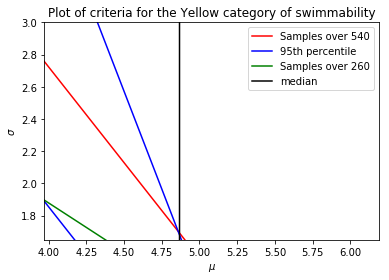

In [10]:
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.8),'r-', label='Samples over 540')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.8),'b-', label='95th percentile')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.66),'b-')
plt.plot(mu, (np.log(1200)-mu) / norm.ppf(0.95),'g-', label = 'Samples over 260')
plt.plot(mu, (mu-np.log(130))/(np.max([10**(-5), norm.ppf(0.5)])), 'k-', label = 'median')
plt.axis([rangemin,rangemax,1.65,3])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Plot of criteria for the Yellow category of swimmability")
plt.legend(loc='upper right')

Orange

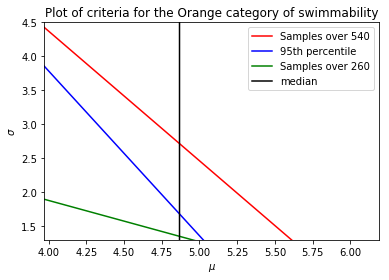

In [11]:
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.7),'r-', label='Samples over 540')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.66),'b-', label='95th percentile')
plt.plot(mu, (np.log(1200)-mu) / norm.ppf(0.95),'g-', label = 'Samples over 260')
plt.plot(mu, (mu-np.log(130))/(np.max([10**(-5), norm.ppf(0.5)])), 'k-', label = 'median')
plt.axis([rangemin,rangemax,1.3,4.5])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Plot of criteria for the Orange category of swimmability")
plt.legend(loc='upper right')

Red

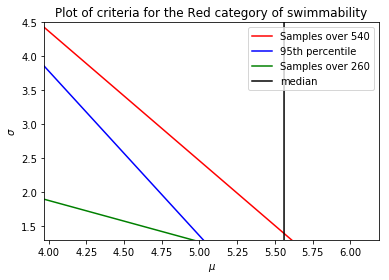

In [12]:
plt.plot(mu, (np.log(540)-mu) / norm.ppf(0.7),'r-', label='Samples over 540')
plt.plot(mu, (np.log(260)-mu) / norm.ppf(0.66),'b-', label='95th percentile')
plt.plot(mu, (np.log(1200)-mu) / norm.ppf(0.95),'g-', label = 'Samples over 260')
plt.plot(mu, (mu-np.log(260))/(np.max([10**(-5), norm.ppf(0.5)])), 'k-', label = 'median')
plt.axis([rangemin,rangemax,1.3,4.5])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Plot of criteria for the Red category of swimmability")
plt.legend(loc='upper right')

Now plot the criteria on a single plot

#### NB 
I chose to plot the criterion of samples over 540 as the instructions on what to plot were extremely vague and I felt this showed the least overlap of the criterion, and also showed how each of the categories were represented in what was the worst criterion dividing the groups of rivers.

Text(0.5,1,'Comparison of Samples over 540 for the five swimmability criterion with regards to their standard deviation and mean')

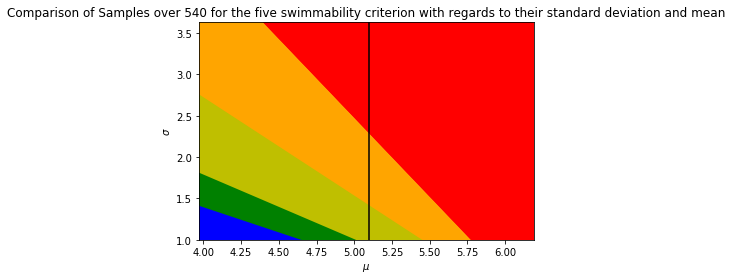

In [13]:
x = np.append(0, mu)
x = np.append(x,0)
vals = (np.log(540)-mu) / norm.ppf(0.95)
by = np.append(0, vals)
by = np.append(by, 0)

gy = np.append(1,(np.log(540)-mu) / norm.ppf(0.9))
gy = np.append(gy, 1)

yy = np.append(1, (np.log(540)-mu) / norm.ppf(0.8))
yy = np.append(yy, 1)

oy = np.append(1, (np.log(540)-mu) / norm.ppf(0.7))
oy = np.append(oy, 1)

ry = np.append(stddev*2, (np.log(540)-mu) / norm.ppf(0.7))
ry = np.append(ry, stddev*2)

rx = np.append(rangemax, mu)
rx = np.append(rx, rangemax+0.1)


plt.fill(rx, ry, 'r-')
plt.fill(x,oy,color = 'orange')
plt.fill(x,yy,'y-')
plt.fill(x, gy, 'g-')
plt.fill(x,by,'b-')

plt.plot([mean,mean],[1,stddev*2], 'k-')


plt.axis([rangemin,rangemax,1,stddev*2])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title("Comparison of Samples over 540 for the five swimmability criterion with regards to their standard deviation and mean")

Create two subsets of the data for the two sites from Assignment 1: "Arawhata Drain at Hokio Beach Road" and "Manawatu at u/s PNCC STP".

For each of the two sites:
- Fit a linear regression with log(count) as the outcome variable and with time as the covariate;
- Calculate and plot the residuals;
- Comment on what the residual plot shows;
- Test the residuals for Normality using the Kolmogorov-Smirnov (K-S) test.  

Note: The Kolmogorov-Smirnov test checks how well some data fits a particular distribution. It is implemented in scipy as kstest, which is imported in the line below. 

(3 Marks)

In [14]:
import datetime

# method to change all the dates to an integer number for use in the polyfit
def strip_time (row):
    day = row['Day']
    d = datetime.datetime.strptime(row['Day'], '%d/%m/%Y')
    int_date = matplot.date2num(d)
    return int_date

# Add a column made up of the time in integer that can be used
df['date_datetime'] = df.apply (lambda row: strip_time(row), axis=1)
df['date_datetime']

df.head()

,Location,Test,Date,Count,Land height,Land type,datetime,Day,Month,Year,logCount,date_datetime
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural,2006-01-02 09:45:00,02/01/2006,01/2006,2006,6.063785,732313.0
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural,2006-01-03 10:10:00,03/01/2006,01/2006,2006,5.857933,732314.0
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural,2006-03-22 11:05:00,22/03/2006,03/2006,2006,6.016157,732392.0
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural,2006-05-24 10:45:00,24/05/2006,05/2006,2006,5.438079,732455.0
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural,2006-06-27 11:20:00,27/06/2006,06/2006,2006,4.174387,732489.0


In [15]:
ara_df = df[df.Location == 'Arawhata Drain at Hokio Beach Road']
ara_df.head()

,Location,Test,Date,Count,Land height,Land type,datetime,Day,Month,Year,logCount,date_datetime
0,Arawhata Drain at Hokio Beach Road,ECOLI,1/02/06 9:45,430.0,Lowland,Rural,2006-01-02 09:45:00,02/01/2006,01/2006,2006,6.063785,732313.0
1,Arawhata Drain at Hokio Beach Road,ECOLI,1/03/06 10:10,350.0,Lowland,Rural,2006-01-03 10:10:00,03/01/2006,01/2006,2006,5.857933,732314.0
2,Arawhata Drain at Hokio Beach Road,ECOLI,22/03/06 11:05,410.0,Lowland,Rural,2006-03-22 11:05:00,22/03/2006,03/2006,2006,6.016157,732392.0
3,Arawhata Drain at Hokio Beach Road,ECOLI,24/05/06 10:45,230.0,Lowland,Rural,2006-05-24 10:45:00,24/05/2006,05/2006,2006,5.438079,732455.0
4,Arawhata Drain at Hokio Beach Road,ECOLI,27/06/06 11:20,65.0,Lowland,Rural,2006-06-27 11:20:00,27/06/2006,06/2006,2006,4.174387,732489.0


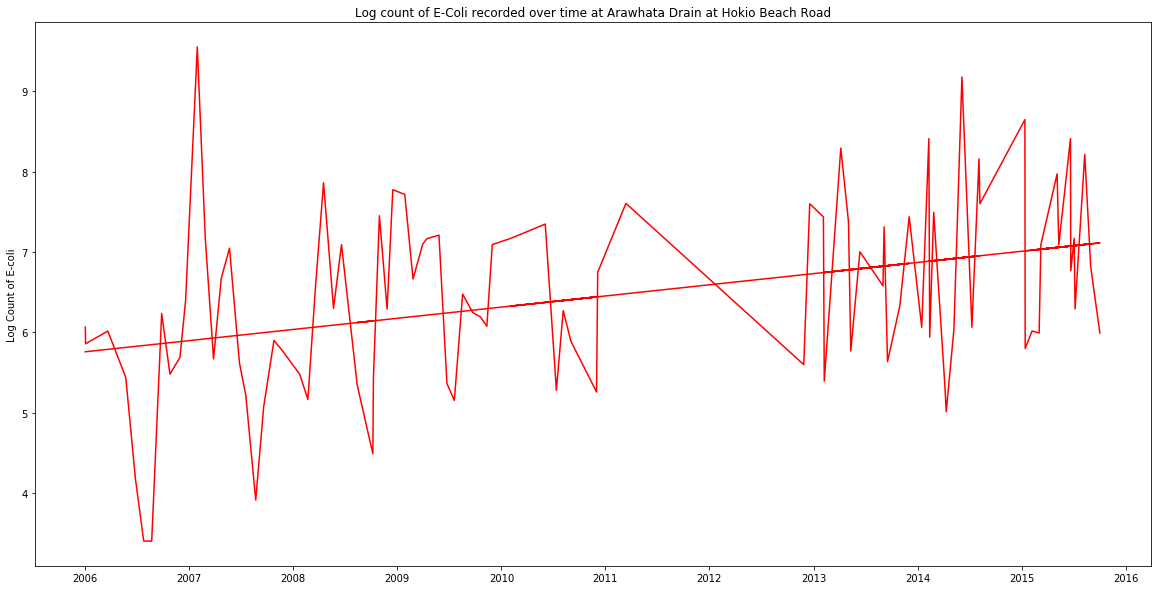

In [16]:
plt.figure(figsize=(20,10))
ara_df = ara_df.sort_values('datetime', ascending=True)
plt.plot(ara_df.date_datetime,ara_df.logCount,'r-')
plt.ylabel('Log Count of E-coli')
plt.title('Log count of E-Coli recorded over time at Arawhata Drain at Hokio Beach Road')

#Make the polyfit lines for f(x) = Arawhata
x = df[df.Location=='Arawhata Drain at Hokio Beach Road'].date_datetime
y =  df[df.Location=='Arawhata Drain at Hokio Beach Road'].logCount

xy = np.polyfit(x, y, deg=1)
f = np.poly1d(xy)
ara_df['predicted_logCount'] = f(x)
plt.plot(x,f(x),'r')

#Change the axis to years instead of meaningless numbers for easy interpretation    
locator = matplot.AutoDateLocator()
ax = plt.axes()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter( matplot.AutoDateFormatter(locator) )


In [17]:
ara_df.shape

(92, 13)

In [18]:
indexs = list(range(0, 92))
zeroes = [0] * len(indexs)

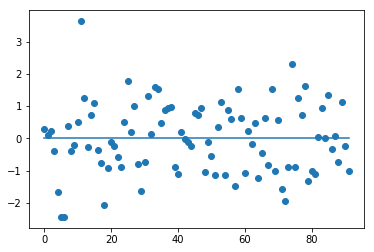

In [19]:
ara_df['predicted_logCount'] = f(x)
ara_df['Residuals'] = ara_df.logCount - ara_df.predicted_logCount
ara_df
plt.scatter(indexs, ara_df['Residuals'])
plt.plot(indexs, zeroes)

Comment on residuals: No obvious funneling, seems to be randomly distributed around 0, looks relatively normal, though does have a U shape to it. one outlier around index 15 which has a residual above 3

(array([ 4.,  5., 20., 17., 17., 17., 10.,  1.,  0.,  1.]),
 array([-2.44588816, -1.83670672, -1.22752527, -0.61834383, -0.00916238,
         0.60001906,  1.20920051,  1.81838195,  2.4275634 ,  3.03674484,
         3.64592629]),
 <a list of 10 Patch objects>)

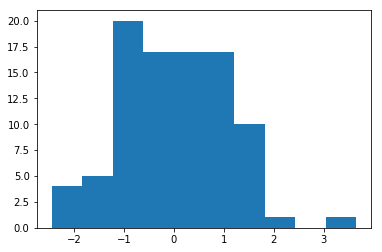

In [20]:
plt.hist(ara_df['Residuals'])

Roughly bell shaped but not as explicit as would like, needs more tests. One obvious outlier residual

In [21]:
mana_df = df[df.Location == 'Manawatu at u/s PNCC STP']
mana_df.head()

,Location,Test,Date,Count,Land height,Land type,datetime,Day,Month,Year,logCount,date_datetime
1656,Manawatu at u/s PNCC STP,ECOLI,18/07/07 9:45,5200.0,Lowland,Rural,2007-07-18 09:45:00,18/07/2007,07/2007,2007,8.556414,732875.0
1657,Manawatu at u/s PNCC STP,ECOLI,22/08/07 9:30,120.0,Lowland,Rural,2007-08-22 09:30:00,22/08/2007,08/2007,2007,4.787492,732910.0
1658,Manawatu at u/s PNCC STP,ECOLI,19/09/07 10:10,40.0,Lowland,Rural,2007-09-19 10:10:00,19/09/2007,09/2007,2007,3.688879,732938.0
1659,Manawatu at u/s PNCC STP,ECOLI,17/10/07 8:35,1100.0,Lowland,Rural,2007-10-17 08:35:00,17/10/2007,10/2007,2007,7.003065,732966.0
1660,Manawatu at u/s PNCC STP,ECOLI,21/11/07 9:55,85.0,Lowland,Rural,2007-11-21 09:55:00,21/11/2007,11/2007,2007,4.442651,733001.0


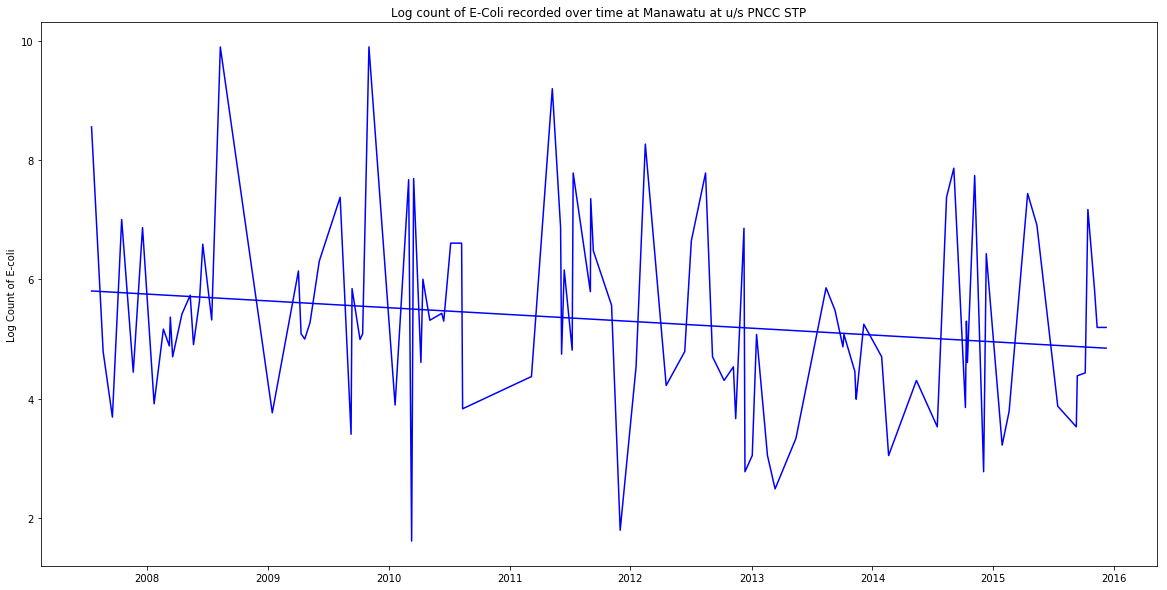

In [22]:
plt.figure(figsize=(20,10))
#Plot the same graph as above in earlier question
mana_df = mana_df.sort_values('datetime', ascending=True)
plt.plot(mana_df.date_datetime,mana_df.logCount,'b-')

plt.ylabel('Log Count of E-coli')
plt.title('Log count of E-Coli recorded over time at Manawatu at u/s PNCC STP')

#Make the polyfit lines for g(x) = Manawatu
a = mana_df.date_datetime
b = mana_df.logCount

ab = np.polyfit(a, b, deg=1)
g = np.poly1d(ab)

#Plot the calculated trendlines
plt.plot(a,g(a),'b')
                         
#Change the axis to years instead of meaningless numbers for easy interpretation    
locator = matplot.AutoDateLocator()
ax = plt.axes()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter( matplot.AutoDateFormatter(locator) )


In [23]:
mana_df.shape


(103, 12)

In [24]:
#Create an index for plotting the residuals, along with a line at 0 to show distribution in positive and negative ranges
indexs = list(range(0, 103))
zeroes = [0] * len(indexs)

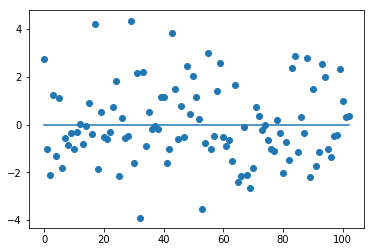

In [25]:
mana_df['predicted_logCount'] = g(a)
mana_df['Residuals'] = mana_df.logCount - mana_df.predicted_logCount
plt.scatter(indexs, mana_df['Residuals'])
plt.plot(indexs, zeroes)

Seems to have random distribution around 0, no curvature or funnelling which suggests normality to the residuals

(array([ 2.,  2., 14., 21., 24., 14., 10.,  9.,  4.,  3.]),
 array([-3.89240162, -3.06758674, -2.24277186, -1.41795698, -0.5931421 ,
         0.23167278,  1.05648765,  1.88130253,  2.70611741,  3.53093229,
         4.35574717]),
 <a list of 10 Patch objects>)

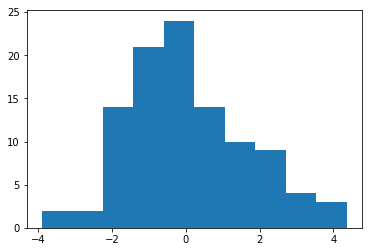

In [26]:
plt.hist(mana_df['Residuals'])

Looks roughly bell shaped but not as symmetrical as would be ideal, suggesting that normality is satisfied but other models may suit better

In [27]:
from scipy.stats import kstest

#Set random seed for reproduction of results
np.random.seed(101111)

#First run the Kolmogorov-Smimov test on Arawhata, printing the results
k = ara_df.Residuals/np.std(ara_df.Residuals)
ara_vals = kstest(k, 'norm')
print("Values for Arawhata Drain at Hokio Beach Road")
print(ara_vals)

#Second run the Kolmogorov-Smimov test on Manawatu, printing the results
r = mana_df.Residuals/np.std(mana_df.Residuals)
#stats.kstest(r,'norm')
mana_vals = kstest(mana_df.Residuals,'norm')
mana_vals = kstest(r,'norm')

print("Values for Manawatu at u/s PNCC STP")
print(mana_vals)

Values for Arawhata Drain at Hokio Beach Road
KstestResult(statistic=0.0605010535935096, pvalue=0.8892367316493376)
Values for Manawatu at u/s PNCC STP
KstestResult(statistic=0.09877767788094982, pvalue=0.2508751319983922)


From this kstest results we can see that the Arawhata drain residuals have a low test statistic and high p-value so we do not reject the null hypothesis. This means that by the KS test there is a normal distribution to the residuals in this dataset

We can also see that the Manawatu drain residuals have a low test statistic and a high p-value compared to the usual p-value decider of 0.05, but that the fit is not as good as for the arawhata data so while the residuals are normally distributed a different distribution may work better with the data.

For each of the two sites:
- Report and interpret the estimated regression coefficients;
- Give confidence intervals for the coefficients;
- Make a statement about the statistical evidence for improvement, no change or deterioration of the water quality.

(3 Marks)

#### For the Arawhata data:

In [28]:
x = ara_df['date_datetime']
y = ara_df['logCount']

fittedmodel = smf.ols(formula="logCount ~ date_datetime", data=ara_df).fit() 
predictions = fittedmodel.predict(ara_df)
# Print out the statistics

fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logCount   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     15.07
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           0.000198
Time:                        13:27:22   Log-Likelihood:                -137.53
No. Observations:                  92   AIC:                             279.1
Df Residuals:                      90   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -273.0618     72.010     -3.792      0.000    -416.123    -130.001
date_datetime     0.0004   9.81e-05      3.881      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.692   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.119
Skew:                           0.217   Prob(JB):                        0.572
Kurtosis:                       3.321   Cond. No.                     4.65e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the Arawhata data we have the regression coefficients:
-273.0618 + 0.0004 logCount
with the confidence interval for the coefficients
(intercept) -416.123 , -130.001
and 
(slope) 0.000 0.001

This shows that the x value, the logcount of E-Coli at the site, is multiplied by 0.0004, which indicates an increase over time. The y-intercept value of -273.06 is impossible, as the count of E-Coli cannot go below 0 so instead it shows that there is a trend in increase of E-Coli over time at this site

From these slope and intercept values we can see that the amount of EColi is increasing over time at this location, and thus there is a deterioration of the water quality. This is also visible in the plotting of the data above.


#### For the Manawatu Data

In [29]:
x = mana_df['date_datetime']
y = mana_df['logCount']

fittedmodel = smf.ols(formula="logCount ~ date_datetime", data=mana_df).fit() 
predictions = fittedmodel.predict(ara_df)
# Print out the statistics

fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logCount   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.219
Date:                Mon, 08 Apr 2019   Prob (F-statistic):             0.0758
Time:                        13:27:22   Log-Likelihood:                -195.39
No. Observations:                 103   AIC:                             394.8
Df Residuals:                     101   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       235.2437    128.153      1.836      0.069     -18.977     489.464
date_datetime    -0.0003      0.000     -1.794      0.076      -0.001    3.31e-05
==============================================================================
Omnibus:                        3.824   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.478
Skew:                           0.449   Prob(JB):                        0.176
Kurtosis:                       3.058   Cond. No.                     5.86e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the Manawatu data we have the regression coefficients:
235.2437 + -0.0003 logCount
with the confidence intervals of:
(intercept) 489.464 -18.977
and 
(slope) -0.001 3.31e-05

This shows that the x-value, the logcount of EColi at the site, is multiplied by -0.0003131, which shows a decrease in time in the number of EColi at the site.
The y-intercept of 235.2 is extremely unlikely, as the highest value of logCount in the data is around 12, but the high positive value when compared with the decreasing x value also shows a decrease in time.

From these slope and intercept values we can see that the amount of EColi over time is decreasing. This indicates a positive impact that there is an improvement in the quality of water at this site, which can be seen in the plotting of data above.